# Ejemplos de Modelos Supervisados - Parte II

Los siguientes ejemplos corresponden a los temas presentados en la clase "Aprendizaje Supervisado - Parte II":

## Ejemplo de naive Bayes con scikit-learn

Procedemos a cargar las librerias correspondientes, **train_test_split** ya lo conocemos de la práctica anterior. La novedad acá es **GaussianNB** que corresponde al clasificador NB Gaussiano y el llamado del dataset **load_breast_cancer**:


In [80]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Se carga ahora el set de datos **load_breast_cancer**:

In [81]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

Entrenamos al sistema con el algoritmo Gaussian NBm, recuerde siempre validar el uso del clasificador en: http://scikit-learn.org/stable/modules/naive_bayes.html 

In [82]:
nbg = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.936
Test set score: 0.974


## Ejemplo Decision Trees 

Procedemos como en el casos anteriores, para más detalles sobre *LDecision Trees* referirse a: http://scikit-learn.org/stable/modules/tree.html

Se llama a la libreria **DecisionTreeClassifier**, se llama la a **DecisionTreeClassifier**, se carga el dataset **load_breast_cancer** (ya se hizo previamente pero lo volvemos a ejecutar acá:

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

Se cargan los datos y se dividen:

In [84]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=42)

Se ejecuta el clasificador:

In [85]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Se imprimen los resultados:

In [86]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


Como se observa, se trata de un arbol puro ya que se ajusta 100% con el training set, es decir, esta memorizando la información suministrada como entrenamiento y por lo tanto no generaliza adecuadamente (overfit). Procedemos a limitar la profundidad del árbol a sólo 4 pruebas (preguntas):

In [87]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.951


ahora con  min_samples_split=15 ...

In [88]:
tree = DecisionTreeClassifier(min_samples_split=15, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.923


Se puede determinar el nivel de importancia de cada atributo con **"tree feature importances"**:

In [89]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.02898825  0.          0.          0.          0.          0.
  0.77559439  0.          0.          0.01423381  0.          0.          0.
  0.00173252  0.          0.          0.          0.          0.
  0.06574509  0.06424941  0.          0.03847168  0.01098484  0.          0.
  0.          0.          0.        ]


De igual forma se puede visualizar usando la siguiente rutina:

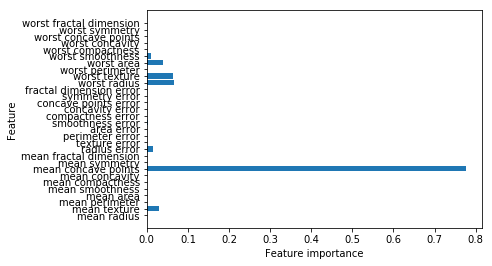

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

## Ejemplo Random Forest

Procedemos como en el casos anteriores, para más detalles sobre *Random Forest* referirse a: http://scikit-learn.org/stable/modules/ensemble.html#forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [92]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.33)
rf = RandomForestClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.941


ahora con más estimators...

In [93]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.947


## Ejemplo kSVM

Procedemos como en el casos anteriores, para más detalles sobre *kSVM* referirse a: http://scikit-learn.org/stable/modules/svm.html#kernel-functions, esta vez iniciamos con el clasificador:

In [94]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


Dados los resultados procedemos a validar visualmente los valores maximos y minimos para este conjunto de datos:

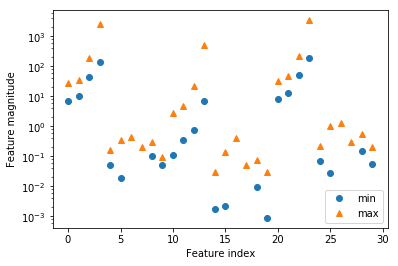

In [95]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

Se procede a hacer un cambio en la escala de los datos, una escala muy adecuada para estos escenarios es la conversión a [0 ... 1]:

In [96]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [97]:
# use THE SAME transformation on the test set,
# using min and range of the training set

X_test_scaled = (X_test - min_on_training) / range_on_training

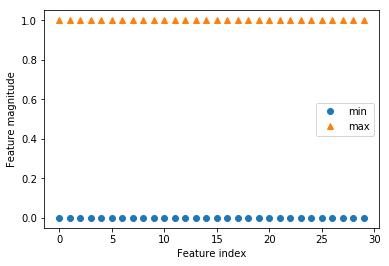

In [98]:
plt.figure()
plt.plot(X_train_scaled.min(axis=0), 'o', label="min")
plt.plot(X_train_scaled.max(axis=0), '^', label="max")
plt.legend(loc=5)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

Ahora se evalua el clasificador con los conjutos de datos escalados:

In [99]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.972


Se puede mejorar? Que tal si lo intentamos encontrando un valor apto para **C**:

In [115]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972
